In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [22]:
# Load the image dataset and convert to numpy array
DATADIR = "/content/drive/MyDrive/face detection"
CATEGORIES = ["with_mask", "without_mask"]

In [23]:
data = []
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        data.append([img_array, class_num])

Index:  0
Label:  with_mask


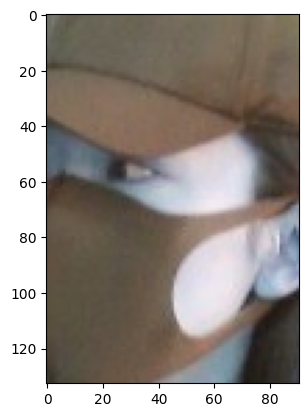

In [24]:
# Print the index values of the first image in the dataset
index = 0
print("Index: ", index)
print("Label: ", CATEGORIES[data[index][1]])
plt.imshow(data[index][0])
plt.show()

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Preprocess the dataset
X = []
y = []
IMG_SIZE = 100 # set a fixed size for the images
for features, label in data:
    resized_img = cv2.resize(features, (IMG_SIZE, IMG_SIZE))
    X.append(resized_img.flatten())
    y.append(label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", lr.score(X_test, y_test))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9230769230769231
Confusion Matrix for Logistic Regression:
[[350  38]
 [ 21 358]]


In [27]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8526727509778357
Confusion Matrix for Decision Tree:
[[336  52]
 [ 61 318]]


In [28]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", svm.score(X_test, y_test))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9452411994784876
Confusion Matrix for SVM:
[[373  15]
 [ 27 352]]


In [29]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", knn.score(X_test, y_test))
print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8748370273794003
Confusion Matrix for KNN:
[[314  74]
 [ 22 357]]


In [30]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", rf.score(X_test, y_test))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9230769230769231
Confusion Matrix for Random Forest:
[[364  24]
 [ 35 344]]


In [31]:
X_train

[array([13, 21, 34, ..., 13, 20, 51], dtype=uint8),
 array([ 22,  30,  37, ...,  26,  87, 137], dtype=uint8),
 array([36, 42, 47, ..., 59, 74, 99], dtype=uint8),
 array([226, 245, 248, ...,  26,  27,  31], dtype=uint8),
 array([21, 34, 48, ..., 74, 55, 58], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([126, 189, 219, ...,  90,  80,  83], dtype=uint8),
 array([171, 170, 174, ..., 255, 254, 255], dtype=uint8),
 array([26, 31, 46, ..., 57, 58, 78], dtype=uint8),
 array([15, 11,  6, ..., 32, 55, 72], dtype=uint8),
 array([68, 61, 50, ..., 65, 69, 63], dtype=uint8),
 array([24, 28, 29, ...,  3, 12, 22], dtype=uint8),
 array([ 29,  35,  76, ..., 147, 145, 165], dtype=uint8),
 array([ 14,  23,  33, ..., 133, 126, 123], dtype=uint8),
 array([ 37,  35,  27, ..., 251, 250, 246], dtype=uint8),
 array([ 79,  62,  65, ..., 152, 169, 195], dtype=uint8),
 array([132,  86,  79, ..., 122,  88, 108], dtype=uint8),
 array([ 20,  19,  23, ..., 151, 147, 144], dtype=uint8),
 array([22

In [32]:
X_test

[array([ 45,  43,  43, ..., 196, 194, 194], dtype=uint8),
 array([ 52,  55,  70, ..., 226, 218, 220], dtype=uint8),
 array([  4,   8,  14, ..., 150, 142, 169], dtype=uint8),
 array([254, 253, 249, ...,  32,  23,  40], dtype=uint8),
 array([183, 181, 140, ..., 131, 161, 187], dtype=uint8),
 array([ 1,  2,  0, ..., 64, 62, 68], dtype=uint8),
 array([ 6, 12, 21, ..., 20, 25, 36], dtype=uint8),
 array([245, 245, 245, ..., 235, 241, 248], dtype=uint8),
 array([43, 47, 57, ..., 66, 48, 55], dtype=uint8),
 array([26, 40, 69, ..., 10, 14, 34], dtype=uint8),
 array([132, 124, 135, ...,  33,  43,  61], dtype=uint8),
 array([ 41, 119, 250, ...,  30, 111, 216], dtype=uint8),
 array([3, 3, 3, ..., 4, 4, 4], dtype=uint8),
 array([107,  99, 111, ..., 127, 143, 165], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([243, 244, 240, ...,  28,  43,  67], dtype=uint8),
 array([88, 80, 97, ..., 16, 17, 27], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

In [33]:
print(y_train,end=' ')

[1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 

In [34]:
print(y_test,end=' ')

[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 